In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from random import uniform as rdm

## Pregunta 1: Regresión Cuadrática

In [2]:
with open('P1grupo_2.csv', 'r') as datos_p1:
    datos_p1 = datos_p1.readlines()[1:]
    datos_p1 = [coord.strip().split(',') for coord in datos_p1]
    x = [float(coord[0]) for coord in datos_p1]
    y = [float(coord[1]) for coord in datos_p1]

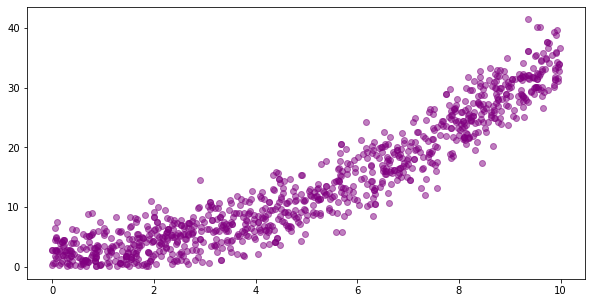

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(x, y,'o', color='purple', alpha=0.5);

### (a) Aplique el método de optimización visto en el curso con que resolvimos el problema de regresión lineal. Deduzca la fórmula para encontrar los coeficientes a partir de los datos.
### $$ y = \beta_{0} + \beta_{1}x + \beta_{2}x^{2} $$

Cantidad de entradas de la regresión:

In [4]:
N = len(x)
N

1000

Creamos el sistema de ecuaciones cuadráticas:

$$ y_1 = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x^{2}_{1}$$
$$ y_2 = \beta_{0} + \beta_{1}x_{2} + \beta_{2}x^{2}_{2}$$
$$ y_3 = \beta_{0} + \beta_{1}x_{3} + \beta_{2}x^{2}_{3}$$
$$...$$
$$ y_{1000} = \beta_{1000} + \beta_{1}x_{1000} + \beta_{2}x^{2}_{1000}$$

Podemos definir los siguientes parámetros:

* $\vec{b}$ := ($y_{0}$, $y_{1}$, $\dots$ ,$y_{1000}$)
* $\vec{x}$ := ($\beta_{2}$, $\beta_{1}$, $\beta_{0}$)
* $A$ una matriz de dimensión $1000 \times 3$ tal que:
$$A = \begin{bmatrix} x_{1}^{2} & x_{1} & 1 \\\\ x_{2}^{2} & x_{2} & 1 \\\\ x_{3}^{2} & x_{3} & 1 \\ \vdots & \vdots & \vdots \\ x_{1000}^{2} & x_{1000} & 1 \end{bmatrix} $$

De modo que 
$$A\vec{x} = \vec{b}$$

Que es lo mismo que
$$ \begin{bmatrix} x_{1}^{2} & x_{1} & 1 \\\\ x_{2}^{2} & x_{2} & 1 \\\\ x_{3}^{2} & x_{3} & 1 \\ \vdots & \vdots & \vdots \\ x_{1000}^{2} & x_{1000} & 1 \end{bmatrix} \begin{pmatrix}\beta_{2} \\ \beta_{1} \\\beta_{0}\end{pmatrix} = \begin{pmatrix}y_{1} \\ y_{2} \\ y_{3}\\ \vdots \\ y_{1000}\end{pmatrix}$$

Represente al sistema de ecuaciones cuadráticas descrito anteriormente.

Nos enfrentamos a el problema de minimizar:
$$f(\vec{x}) = || A\vec{x} - \vec{b}||_{2}^{2}$$

Por lo que buscaremos el gradiente de $f$ e igualarlo a 0.

$$\nabla f = 0$$

Separamos $f$ en una composición de funciones $N$ y $E$, tal que:

* $E: \mathbb{R}^{3} \rightarrow \mathbb{R}^{1000}$, donde $E(\vec{x}) = A\vec{x} - \vec{b}$
* $N: \mathbb{R}^{1000} \rightarrow \mathbb{R}$, donde $N(\vec{\alpha}) = ||\vec{\alpha}||_2^{2}$

Aplicando Regla de la Cadena tenemos que:

$$\nabla f(\vec{x}) = \nabla N(E(\vec{x}))\cdot E'(\vec{x}) = 0$$

Primero, busquemos $\nabla N(\vec{\alpha})$

$$N(\vec{\alpha}) = ||\vec{\alpha}||_2^{2} = \alpha_{1}^{2} + \alpha_{2}^{2} + \alpha_{3}^{2} + \dots + \alpha_{1000}^{2}$$

$$\Rightarrow \nabla N(\vec{\alpha}) = \begin{pmatrix} \frac{\partial N}{\partial \alpha_{1}} & \frac{\partial N}{\partial \alpha_{2}} & \frac{\partial N}{\partial \alpha_{3}} & \dots & \frac{\partial N}{\partial \alpha_{1000}}\end{pmatrix} = \begin{pmatrix} 2\alpha_{1} &  2\alpha_{2} & 2\alpha_{3} & \dots & 2\alpha_{1000}\end{pmatrix} = 2\vec{\alpha}^{T} $$

Ahora, busquemos $E'(\vec{x})$, con $\vec{x}$ = ($\beta_{2}$, $\beta_{1}$, $\beta_{0}$)

$$E(\vec{x}) = A\vec{x} - \vec{b} =  \begin{bmatrix} \beta_{2}x_{1}^{2} + \beta_{1}x_{1} + \beta_{0} - y_{1} \\\\ \beta_{2}x_{2}^{2} + \beta_{1}x_{2} + \beta_{0} - y_{2}\\\\ \beta_{2}x_{3}^{2} + \beta_{1}x_{3} + \beta_{0} - y_{3}\\ \vdots \\ \beta_{2}x_{1000}^{2} + \beta_{1}x_{1000} + \beta_{0} - y_{1000}\end{bmatrix}$$

$$\Rightarrow E_{i}(\vec{x}) = \beta_{2}x_{i}^{2} + \beta_{1}x_{i} + \beta_{0} - y_{i} \hspace{0.5cm} \forall i = 1,2,3,\dots, 1000$$

$$\Rightarrow \frac{\partial E_{i}(\vec{x})}{\partial \beta_{2}} = x_{i}^{2} \hspace{0.25cm};\hspace{0.25cm} \frac{\partial E_{i}(\vec{x})}{\partial \beta_{1}} = x_{i} \hspace{0.25cm};\hspace{0.25cm} \frac{\partial E_{i}(\vec{x})}{\partial \beta_{0}} = 1 $$

$$\Rightarrow E'(\vec{x}) = \begin{bmatrix} x_{1}^{2} & x_{1} & 1 \\\\ x_{2}^{2} & x_{2} & 1 \\\\ x_{3}^{2} & x_{3} & 1 \\ \vdots & \vdots & \vdots \\ x_{1000}^{2} & x_{1000} & 1 \end{bmatrix} = A$$

Juntando todo lo anterior llegamos a:

$$\nabla f(\vec{x}) = \nabla N(E(\vec{x}))\cdot E'(\vec{x}) = 2E(\vec{x})^{T}\cdot A = 2(A\vec{x} - \vec{b})^{T}\cdot A$$

Como estamos minimizando $f$, igualamos el gradiente a 0:

$$\Rightarrow 2(A\vec{x} - \vec{b})^{T}\cdot A = 0$$
$$\Leftrightarrow (A\vec{x} - \vec{b})^{T}\cdot A = 0$$
$$\Leftrightarrow ((A\vec{x})^{T} - \vec{b}^{T})\cdot A = 0$$
$$\Leftrightarrow (\vec{x}^{T}\cdot A^{T} - \vec{b}^{T})\cdot A = 0$$
$$\Leftrightarrow \vec{x}^{T}\cdot A^{T}\cdot A - \vec{b}^{T}\cdot A = 0$$
$$\Leftrightarrow \vec{x}^{T}\cdot A^{T}\cdot A = \vec{b}^{T}\cdot A $$


Sea $M = A^{T} \cdot A$ una matriz de $3 \times 3$ y cumple que:

$$M_{ij} > 0 \hspace{0.5cm}\forall i,j = 1, 2, 3$$

Claramente podemos deducir que el determinante de la matriz $M$ es distinto de 0, por lo que existe la inversa $M^{-1}$ de dimensión $3 \times 3$. Con esto, podemos usarlo de modo que:

$$\Rightarrow \vec{x}^{T}\cdot A^{T}\cdot A = \vec{b}^{T}\cdot A $$
$$\Leftrightarrow \vec{x}^{T}\cdot M= \vec{b}^{T}\cdot A \hspace{0.25cm}/\cdot M^{-1}$$
$$\Leftrightarrow \vec{x}^{T}\cdot M \cdot M^{-1}= \vec{b}^{T}\cdot A \cdot M^{-1}$$
$$\Leftrightarrow \vec{x}^{T}= \vec{b}^{T}\cdot A \cdot M^{-1} \hspace{0.25cm}$$
$$\Leftrightarrow \vec{x}^{T}= \vec{b}^{T}\cdot A \cdot (A^{T} \cdot A)^{-1} \hspace{0.25cm}/()^{T}$$
$$\Leftrightarrow \vec{x}= (A^{T} \cdot A)^{-1}\cdot A^{T}\cdot \vec{b}$$



### (b) Encuentre los valores de $\beta_{0}, \beta_{1}, \beta_{2} \in \mathbb{R}$ buscados.

Definamos primeros las funciones que nos serviran para esto.

Función que crea la Matriz $A$ definida en la parte (a), recibe como parámetro el vector con todos los valores de $x$ y retorna la matriz correspondiente:

In [5]:
def matrix_A(x_vec):
    matrix = []
    for x in x_vec:
        matrix.append([x**2, x, 1]) # Creamos las filas correspondientes
    return np.array(matrix)

Función que calcula el vector $\vec{x}$ definida en la parte (a), recibe como parámetro la Matriz $A$ y el vector $\vec{b}$ que contiene todos los valores de y y retorna el vector con los 3 betas correspondientes en el orden de $\beta_{0}$, $\beta_{1}$ y $\beta_{2}$:

In [6]:
def cal_betas(A, b):
    At = A.T # Transpuesta de A
    M = At.dot(A) # Creamos la matriz M, definida en la parte (a)
    M_inv = np.linalg.inv(M) 
    x = M_inv.dot(At) 
    x = x.dot(b) # Calculamos el vector x
    return x

Creamos los vectores para los valores de x, y para los valores de y entregados anteriormente:

In [7]:
x_vec = np.array(x)
y_vec = np.array(y)

Creamos la matriz A definida en la parte (a) de esta pregunta:

In [8]:
A = matrix_A(x_vec)

Y finalmente buscamos los betas que minimizan resuelven este problema de minimización:

In [9]:
betas = cal_betas(A, y_vec)
betas

array([0.31869991, 0.10100721, 2.54573091])

Aplicando lo que hicimos teoricamente nos queda que:

$$\beta_{0} = 2.54573091 \hspace{0.25cm} \beta_{1} = 0.10100721 \hspace{0.25cm} \beta_{2} = 0.31869991$$

### (c) Grafique en conjunto los datos entregados y la regresión cuadrática encontrada.



Ya obtenidos los valores de $\beta_{0}$, $\beta_{1}$ y $\beta_{2}$, guardamos los valores de obtenidos al calcular $A\vec{x} = \vec{b}$

In [10]:
b_vec = A.dot(betas)

Finalmente graficamos los datos entregados y la regresión cuadrática encontrada:

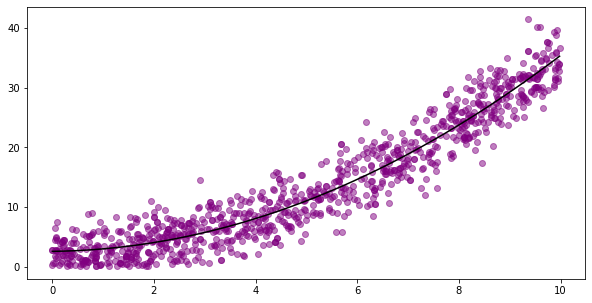

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10,5)) 
ax.plot(x_vec, y_vec,'o', color='purple', alpha=0.5) # Datos Entregados
ax.plot(x_vec, b_vec, color='black'); # Regresión Cuadrática



# Pregunta 2: Red Neuronal.

In [12]:
def leer():
    with open("P2grupo_2.csv") as datos_p2:
        f = []
        for l in datos_p2:
            l = l.strip().split(',')
            for m in range(len(l)):
                l[m] = float(l[m])
            f.append(l)
    return f

datos_p2 = leer()
n = len(datos_p2)

### (a) Considere la función de activación sigmoide
### $$\sigma(t) = \frac{1}{1 + e^{-t}}$$
### y encuentre una expresión para su derivada $\sigma'(t)$.

Usamos la regla de derivación para el cociente: $[(\frac{f}{g})' = \frac{f'g - fg'}{g^{2}}]$. Obtenemos que
#### $$\sigma '(t) =\frac{(1)'(1 + e^{-t}) - (1)(1 + e^{-t})'}{(1 + e^{-t})^{2}} = \frac{-e^{-t}}{(1 + e^{-t})^{2}}$$

### (b) Considerando los datos de entrenamiento $(u_i, v_i, w_i, z_i) \in \mathbb{R}^{4}$ construya $J = J(a, b, c, d, e, f)$ la función de pérdida del error cuadrático medio, como vimos en el ejemplo del curso, y calcule explícitamente su gradiente en un punto cualquiera $(a, b, c, d, e, f ) \in \mathbb{R}^{6}$.

Sea $Z$ el conjunto con los valores de salida entregados en los datos de entrenamiento y $\hat{Z}$ el conjunto de los valores predichos por nuestra función de activación a partir de los valores de entreda de los datos de entrenamiento, podemos definir J como:

$$J=\frac{1}{n}\sum_{i=1}^{n} (Z_i-\hat{Z_i})^2$$
$$ \Longleftrightarrow J=\frac{1}{n}\sum_{i=1}^{n} Z^2_i -2Z_i\hat{Z_i}+\hat{Z_i}^2$$
$$ \Longleftrightarrow J = \frac{1}{n}\sum_{i=1}^{n} \left[Z^2_i - 2Z_i \cdot \sigma(d \cdot \sigma(a u_i + b v_i + c w_i + e) + f) + \sigma(d \cdot  \sigma(a u_i + b v_i + c w_i + e) + f)^2 \right] $$

$$ \Longleftrightarrow J = \frac{1}{n}\sum_{i=1}^{n} Z^2_i - \frac{2}{n}\sum_{i=1}^{n} \left[Z_i \cdot \sigma(d \cdot \sigma(a u_i + b v_i + c w_i + e) + f)\right] + \frac{1}{n}\sum_{i=1}^{n} \left[\sigma(d \cdot \sigma(a u_i + b v_i + c w_i + e) + f)^2\right] $$

Para construir J, modelaremos las funciones sigmoide, derv (derivada de sigmoide, la usaremos más adelante) y capas. Esta última modela el funcionamiento de la red neuronal.

In [13]:
def sigmoide(t):
    return 1/(1 + math.e**(-t))

def derv(t):
    return (math.e**(-t))/(1+math.e**(-t))**2

def capas(a, b, c, d, e, f, l):
    Y = sigmoide(a*l[0] + b*l[1] + c*l[2] + e)
    Z = sigmoide(d*Y + f)
    return (Y, Z)

Estamos listos para generar la función J, es decir, la función de pérdida del error cuadrático medio:

In [14]:
def J(a, b, c, d, e, f):
    MSE = 0
    for l in datos_p2:
        predict = capas(a, b, c, d, e, f, l)[1]
        dif = (l[3] - predict)**2   #l[3]: valores reales
        MSE += dif

    MSE *= 1/n
    return MSE

Ahora, calculemos el gradiente de $J$, que está dado por $[\frac{\partial J}{\partial a}, \frac{\partial J}{\partial b}, \frac{\partial J}{\partial c}, \frac{\partial J}{\partial d}, \frac{\partial J}{\partial e}, \frac{\partial J}{\partial f}]$. Definimos $\alpha =d \cdot \sigma( a u_i + b v_i + c w_i + e) + f$ (Z) y $\beta = a u_i + b v_i + c w_i + e$ (Y) para mayor facilidad en los cálculos. Entonces tenemos que:

$$\frac{\partial J}{\partial a} = -\frac{2}{n} \sum_{i=1}^{n} [Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot u_i] + \frac{2}{n} \sum_{i=1}^{n}[\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot u_i]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot u_i - Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot u_i]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot u_i(\sigma(\alpha) - Z_i)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[\frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}} \cdot d \cdot \frac{-e^{-\beta}}{(1 + e^{-\beta})^{2}} \cdot u_i \Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big)\Bigg] $$
$$ =\frac{2 \cdot d}{n} \sum_{i=1}^{n} \Bigg[ \frac{e^{(-\alpha - \beta)}\cdot u_i}{(1 + e^{-\beta} + e^{-\alpha} + e^{(-\alpha 
-\beta)})^{2}}\Big(\frac{1}{1+e^{-\alpha}} - Z_i\Big)\Bigg] $$

In [15]:
#Z = ALPHA = pred[1]
#Y = BETA = pred[0]

def derv_a(a, b, c, d, e, f):
    suma = 0
    for l in datos_p2:
        pred = capas(a, b, c, d, e, f, l)
        add = derv(pred[1]) * d * derv(pred[0]) * l[0] * (sigmoide(pred[1]) - l[3])
        suma += add
    return (2/n) * suma
    

$$\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} [Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot v_i] + \frac{2}{n} \sum_{i=1}^{n}[\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot v_i]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot v_i - Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot v_i]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot v_i(\sigma(\alpha) - Z_i)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[\frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}} \cdot d \cdot \frac{-e^{-\beta}}{(1 + e^{-\beta})^{2}} \cdot v_i \Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big)\Bigg] $$
$$ =\frac{2 \cdot d}{n} \sum_{i=1}^{n} \Bigg[ \frac{e^{(-\alpha - \beta)}\cdot v_i}{(1 + e^{-\beta} + e^{-\alpha} + e^{(-\alpha -\beta)})^{2}}\Big(\frac{1}{1+e^{-\alpha}} - Z_i\Big)\Bigg] $$



In [16]:
def derv_b(a, b, c, d, e, f):
    suma = 0
    for l in datos_p2:
        pred = capas(a, b, c, d, e, f, l)
        add = derv(pred[1]) * d * derv(pred[0]) * l[1] * (sigmoide(pred[1]) - l[3])
        suma += add
    return (2/n) * suma
    

$$\frac{\partial J}{\partial c} = -\frac{2}{n} \sum_{i=1}^{n} [Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot w_i] + \frac{2}{n} \sum_{i=1}^{n}[\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot w_i]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot w_i - Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot w_i]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma'(\alpha) \cdot d \cdot \sigma'(\beta) \cdot w_i(\sigma(\alpha) - Z_i)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[\frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}} \cdot d \cdot \frac{-e^{-\beta}}{(1 + e^{-\beta})^{2}} \cdot w_i \Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big)\Bigg] $$
$$ =\frac{2 \cdot d}{n} \sum_{i=1}^{n} \Bigg[ \frac{e^{(-\alpha - \beta)}\cdot w_i}{(1 + e^{-\beta} + e^{-\alpha} + e^{(-\alpha -\beta)})^{2}}\Big(\frac{1}{1+e^{-\alpha}} - Z_i\Big)\Bigg] $$



In [17]:
def derv_c(a, b, c, d, e, f):
    suma = 0
    for l in datos_p2:
        pred = capas(a, b, c, d, e, f, l)
        add = derv(pred[1]) * d * derv(pred[0]) * l[2] * (sigmoide(pred[1]) - l[3])
        suma += add
    return (2/n) * suma
    

$$\frac{\partial J}{\partial d} = -\frac{2}{n} \sum_{i=1}^{n} [Z_i \cdot \sigma'(\alpha) \cdot \sigma(\beta)] + \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) \cdot \sigma(\beta)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) \cdot \sigma(\beta) - Z_i \cdot \sigma'(\alpha) \cdot \sigma(\beta)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma'(\alpha) \cdot \sigma(\beta) (\sigma(\alpha) - Z_i) ]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[\frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}} \cdot \frac{1}{(1 + e^{-\beta})} \cdot \Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big)\Bigg]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[\frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}(1 + e^{-\beta})} \cdot \Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big)\Bigg]$$



In [18]:
def derv_d(a, b, c, d, e, f):
    suma = 0
    for l in datos_p2:
        pred = capas(a, b, c, d, e, f, l)
        add = derv(pred[1]) * sigmoide(pred[0]) * (sigmoide(pred[1]) - l[3])
        suma += add
    return (2/n) * suma
    

$$\frac{\partial J}{\partial e} =  -\frac{2}{n} \sum_{i=1}^{n} [Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta)] + \frac{2}{n} \sum_{i=1}^{n}[\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta) - Z_i \cdot \sigma'(\alpha) \cdot d \cdot \sigma'(\beta)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma'(\alpha) \cdot d \cdot \sigma'(\beta)(\sigma(\alpha) - Z_i)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[\frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}} \cdot d \cdot \frac{-e^{-\beta}}{(1 + e^{-\beta})^{2}}\Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big)\Bigg] $$
$$ =\frac{2 \cdot d}{n} \sum_{i=1}^{n} \Bigg[ \frac{e^{(-\alpha - \beta)}}{(1 + e^{-\beta} + e^{-\alpha} + e^{(-\alpha -\beta)})^{2}}\Big(\frac{1}{1+e^{-\alpha}} - Z_i\Big)\Bigg] $$



In [19]:
def derv_e(a, b, c, d, e, f):
    suma = 0
    for l in datos_p2:
        pred = capas(a, b, c, d, e, f, l)
        add = derv(pred[1]) * d * derv(pred[0]) * (sigmoide(pred[1]) - l[3])
        suma += add
    return (2/n) * suma
    

$$\frac{\partial J}{\partial f} =  -\frac{2}{n} \sum_{i=1}^{n} [Z_i \cdot \sigma'(\alpha)] + \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma(\alpha) \cdot \sigma'(\alpha) - Z_i \cdot \sigma'(\alpha)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} [\sigma'(\alpha)(\sigma(\alpha) - Z_i)]$$
$$ = \frac{2}{n} \sum_{i=1}^{n} \Bigg[ \frac{-e^{-\alpha}}{(1 + e^{-\alpha})^{2}} \Big(\frac{1}{1+e^{-\alpha}} - Z_i \Big) \Bigg]$$

In [20]:
def derv_f(a, b, c, d, e, f):
    suma = 0
    for l in datos_p2:
        pred = capas(a, b, c, d, e, f, l)
        add = derv(pred[1]) * (sigmoide(pred[1]) - l[3])
        suma += add
    return (2/n) * suma
    

### (c) Inicialice los pesos y sesgos de esta Red Neuronal asignándole valores en el intervalo [−5, 5] a los parámetros $a_0, b_0, c_0, d_0, e_0, f_0$ y calcule $J(a_0, b_0, c_0, d_0, e_0, f_0)$.

Vamos a escoger un valor aleatorio para cada parámetro cada vez que se ejectute el código:

In [21]:
a, b, c, d, e, f = rdm(-5,5), rdm(-5,5), rdm(-5,5), rdm(-5,5), rdm(-5,5), rdm(-5,5)
MSE = J(a, b, c, d, e, f)
print(f'Escogiendo a:{a}, b:{b}, c:{c}, d:{d}, e:{e}, f:{f}, el error cuadratico medio es de {MSE}')

Escogiendo a:-4.317464066268676, b:0.6986496226525132, c:-2.1116536337247958, d:2.086764183712871, e:4.9543959150898615, f:2.6983093383364647, el error cuadratico medio es de 0.4915179446947655


### (d) Para la búsqueda de un mínimo programe un algoritmo de descenso del gradiente
##### $$(a_{k+1}, b_{k+1}, c_{k+1}, d_{k+1}, e_{k+1}, f_{k+1})^{T} = (a_{k}, b_{k}, c_{k}, d_{k}, e_{k}, f_{k+1})^{T} - \varepsilon \nabla J(a_{k}, b_{k}, c_{k}, d_{k}, e_{k}, f_{k+1})$$
### con un paso fijo $\varepsilon = 0,1$ y genere 2000 iteraciones. Muestre con un gráfico la evolución del error $J$ usando los datos generados.

Para generar la funcion de descenso vamos a establecer $\varepsilon$, el paso con el que descendemos en direccion contraria al gradiente, de esta manera potencialmente nos podremos aproximar a un mínimo.

In [22]:
epsilon = 0.1
iteraciones = 2000

In [23]:
# Se actualiza los valores de cada valor respecto al paso en dirección contraria a su derivada

def descenso(a, b, c, d, e, f, ep):    
    a = a - epsilon * derv_a(a, b, c, d, e, f)
    b = b - epsilon * derv_b(a, b, c, d, e, f)
    c = c - epsilon * derv_c(a, b, c, d, e, f)
    d = d - epsilon * derv_d(a, b, c, d, e, f)
    e = e - epsilon * derv_e(a, b, c, d, e, f)
    f = f - epsilon * derv_f(a, b, c, d, e, f)
    
    return(a, b, c, d, e, f)

In [24]:
# LLevamos a cabo las iteraciones, llamando a la fucion descenso.

errores = []    # Almacenamos cada error
for i in range(iteraciones):
    a, b, c, d, e, f = descenso(a, b, c, d, e, f, epsilon)
    perdida = J(a, b, c, d, e, f)
    errores.append(perdida)

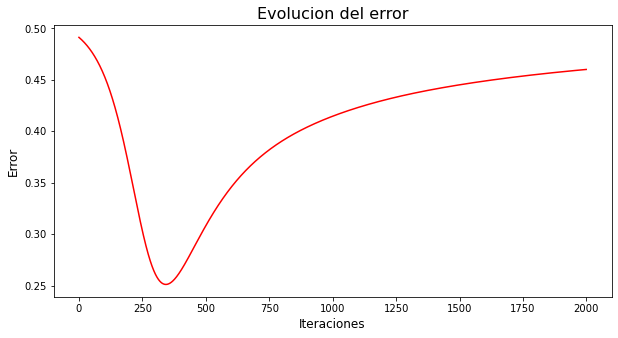

In [25]:
#Graficamos la evolución del error

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(range(iteraciones), errores, color='red')
ax.set_title("Evolucion del error", fontsize=16)
ax.set_xlabel("Iteraciones", fontsize=12)
ax.set_ylabel("Error", fontsize=12)
plt.show()

Observamos que cerca de las 300 iteraciones la función se acerca a un mínimo, este valor es

In [26]:
print(f'{errores[299]}')

0.2622503664244932


#### (e) Entregue los valores encontrados para $(a_{2000}, b_{2000}, c_{2000}, d_{2000}, e_{2000}, f_{2000}) \in \mathbb{R}^{6}$ y el valor
### $$J(a_{2000}, b_{2000}, c_{2000}, d_{2000}, e_{2000}, f_{2000}).$$

In [27]:
print(f'los valores de la ultima iteracion, 2000, son a = {a}, b = {b}, c = {c}, d = {d}, e = {e}, f = {f}.')

print(f'El error respectivo es {errores[1999]}')

los valores de la ultima iteracion, 2000, son a = -17.333830424749856, b = -0.6796896605529038, c = -3.554614347963738, d = -3.0281431146349926, e = 4.596044312902031, f = -2.9600576806636836.
El error respectivo es 0.4601021725133798
